# Introduction to Logistic Regression

In this notebook you will see how logistic regression works very graphically. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()

Next, we’ll take advantage of the `make_classification` function from the scikit-learn library to generate data. 
Since logistic regression is primarily only applicable to binary classification problems, the data points in our case are composed of two classes.

In [7]:
# We set a random state so the generated data is the same for each run of this cell
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    random_state=3789
)

In [8]:
data = {"x":x.reshape((100,)), "y":y.reshape((100,))}

In [9]:
df = pd.DataFrame(data=data)
df

,x,y
0,1.071387,1
1,1.637385,1
2,0.946752,1
3,2.302251,1
4,0.528806,1
...,...,...
95,-1.414146,0
96,1.119315,1
97,-1.354310,0
98,0.547361,1


In [10]:
# statistical properties for each class y (0,1)
statistical_properties_for_class = df.groupby(by=['y'])[["x"]].describe()
statistical_properties_for_class

x                                                                      
  count      mean       std       min       25%       50%       75%       max
y                                                                            
0  51.0 -0.807349  0.969754 -2.607748 -1.430320 -0.778034 -0.236799  2.057215
1  49.0  0.891327  0.544230 -0.476926  0.542125  0.965722  1.169664  2.302251

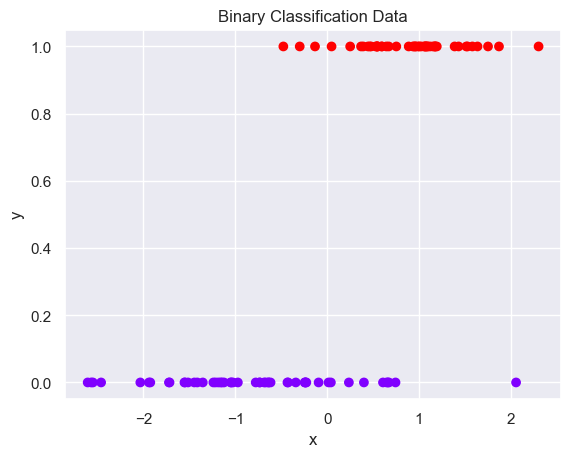

In [11]:
# We plot the relationship between the feature and classes. 
plt.scatter(x, y, c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Binary Classification Data")
plt.savefig("binary_classification_data.png");

The above depicts a graph of a binary classification dataset.  The y-axis represents the true class labels for each data point. In this dataset, y = 0 likely represents the negative class and y=1 represents the positive class. The x-axis,  depicts one variable.
For observation belonging to the negative class (y=0) x ranges from -2.6 and 2.03, and for observation belonging to the positive class (y=1) x ranges from -0.48 and 2.30. Check statistical_properties_for_class python variable for more statistical information.

In [12]:
# Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [13]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels 
# (since Logistic Regression is a supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
# We can access the following properties to actually view the model parameter.
print(lr.coef_)
print(lr.intercept_)

[[2.17662474]]
[-0.05037611]


In [15]:
# Let’s see how the model performs against data that it hasn’t been trained on.
y_pred = lr.predict(X_test)

In [16]:
# Given that this is a classification problem, we use a confusion matrix to evaluate our model.
confusion_matrix(y_test, y_pred)

array([[12,  4],
       [ 0,  9]], dtype=int64)

In [17]:
# If for whatever reason we’d like to check the actual probability that a data point belongs to a given class, 
# we can use the predict_proba function.
lr.predict_proba(X_test)

array([[0.98582561, 0.01417439],
       [0.17225006, 0.82774994],
       [0.92934938, 0.07065062],
       [0.13215422, 0.86784578],
       [0.68864373, 0.31135627],
       [0.16949557, 0.83050443],
       [0.99632542, 0.00367458],
       [0.97810516, 0.02189484],
       [0.89721872, 0.10278128],
       [0.97781542, 0.02218458],
       [0.63745537, 0.36254463],
       [0.2042561 , 0.7957439 ],
       [0.10819387, 0.89180613],
       [0.82404145, 0.17595855],
       [0.0325378 , 0.9674622 ],
       [0.07543907, 0.92456093],
       [0.30554031, 0.69445969],
       [0.19568065, 0.80431935],
       [0.04877166, 0.95122834],
       [0.24487613, 0.75512387],
       [0.11812066, 0.88187934],
       [0.5042553 , 0.4957447 ],
       [0.95249277, 0.04750723],
       [0.03640296, 0.96359704],
       [0.98625784, 0.01374216]])

In [18]:
pd.DataFrame(lr.predict_proba(X_test))

,0,1
0,0.985826,0.014174
1,0.172250,0.827750
2,0.929349,0.070651
3,0.132154,0.867846
4,0.688644,0.311356
5,0.169496,0.830504
6,0.996325,0.003675
7,0.978105,0.021895
8,0.897219,0.102781
9,0.977815,0.022185


The first column corresponds to the probability that the sample belongs to the first class (our case y=0) and the second column corresponds to the probability that the sample belongs to the second class (our case y=1).
Before attempting to plot the Sigmoid function (it gives the probability that a certain observation belongs to the positive class), we create and sort a DataFrame containing our test data.

The sigmoid function reads:
$$\sigma = \dfrac{1}{1+e^{-t}} =  \dfrac{1}{1+e^{-(b_{0} + b_{1}*X)}}$$

In [19]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_test})
df = df.sort_values(by='x')

In [20]:
df

,x,y
6,-2.550857,0
24,-1.940194,0
0,-1.925765,0
7,-1.722387,0
9,-1.716211,0
22,-1.354310,0
2,-1.160679,0
8,-0.972295,0
13,-0.686198,0
4,-0.341543,0


In [21]:
from scipy.special import expit

sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()

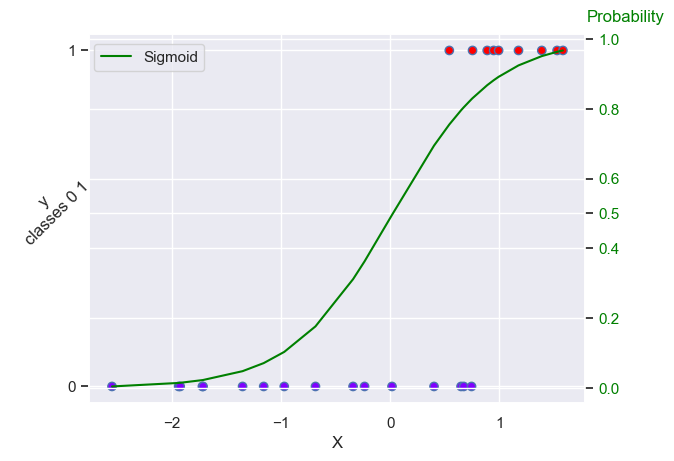

In [22]:
fig, ax = plt.subplots(sharey=True)

# Plot binary classification data
ax.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')
ax.tick_params(axis='y')
ax.set_xlabel('X')
ax.set_ylabel('y\nclasses 0 1', rotation=45)
ax.set_yticks([0.0, 1.0])

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot sigmoid function, change tick color
ax2.plot(df['x'],sigmoid_function, color='green', label= "Sigmoid")
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_yticks(np.insert(ax2.get_yticks()[1:-1], 3, 0.5))
ax2.text(x=1.8,y=1.05,s="Probability",color='Green')

ax2.legend(loc=(0.01,0.9))
plt.show()

The above depicts a graph of a binary classification dataset.  The y-axis represents the true class labels for each data point. In this dataset, y = 0 likely represents the negative class and y=1 represents the positive class. The x-axis,  depicts one variable.
For observation belonging to the negative class (y=0) x ranges from -2.55 and 0.74 showed with blue dots, and for observation belonging to the positive class (y=1) x ranges from 0.54 and 1.58 and showed by red dots. There is a green line representing the sigmoid function which in y = 0.5 (threshold) has the x = $-b_0/b_1 = 0.023...$. there are 4 blue dots which have x larger than this value.

**Check your understanding:**
- Which value of X correspond to a probability threshold of 0.5?
- How many data points will be misclassified in the graph above if you choose a probability threshold at 0.5?
- Which threshold would you choose to improve the accuracy?
- Which threshold would you choose to improve recall?

Answer:
1. The x value of 0.023 corresponds to a probabilty threshold of 0.5
2. 4 data points whose x value is bigger than 0.023 but belong to class 0 will be misclassified as class 1
3. To improve accuracy, I would evaluate different thresholds and choose the one that maximizes accuracy on a validation set. In this dataset, a higher threshold than 0.5 reduces false positives and may improve accuracy.
4. To improve recall, I would choose a lower threshold than 0.5, because this increases the number of true positives in this dataset. However, lowering the threshold may also introduce false positives and reduce precision